## The rise of India's Gross Domestic Product metric- An analysis.

In [1]:
#print("hello")

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("India_GDP_1960-2022.csv")
df.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


In [2]:
#Dropping the first column

df.drop(columns= "Unnamed: 0", axis=1,inplace=True)

df.head()

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%


In [3]:
#Renaming the columns 

columns = {
    'India GDP - Historical Data' : 'Year',
    'India GDP - Historical Data.1'	: 'GDP (in billion dollars)',
    'India GDP - Historical Data.2'	: 'Per Capita (in dollars)',
    'India GDP - Historical Data.3' : 'Growth'

}

df.rename(columns=columns,inplace=True)

df.head()

,Year,GDP (in billion dollars),Per Capita (in dollars),Growth
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%


In [4]:
#Remove the first row.

df.drop(index=0,inplace=True)

df

,Year,GDP (in billion dollars),Per Capita (in dollars),Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
5,2017,"$2,651.47B","$1,981",6.80%
...,...,...,...,...
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%


In [5]:
#Check for null values in the dataset
df.isnull().sum()

Year                        0
GDP (in billion dollars)    0
Per Capita (in dollars)     0
Growth                      0
dtype: int64

In [6]:
#Convert GDP ,Per Capita and Growth columns in integer

df['GDP (in billion dollars)'] = df['GDP (in billion dollars)'].replace('[\$\,\.\"B"]', '', regex=True).astype(int)
df

df['Per Capita (in dollars)'] = df['Per Capita (in dollars)'].replace('[\$\,\.]','',regex=True).astype(int)
df['Growth'] = df['Growth'].replace(["%"], ["0%"])

df['Growth'] = df['Growth'].replace('[\"%"\.\""]', '', regex=True).astype(int)
df['Growth'] = df['Growth']/100

In [7]:
#check data-type of each column
df.dtypes

Year                         object
GDP (in billion dollars)      int32
Per Capita (in dollars)       int32
Growth                      float64
dtype: object

#### Let us visualize the data

...



([<matplotlib.axis.XTick at 0x205f48d8550>,
 [Text(0.0, 0, '2021'),
  Text(5.0, 0, '2016'),
  Text(10.0, 0, '2011'),
  Text(15.0, 0, '2006'),
  Text(20.0, 0, '2001'),
  Text(25.0, 0, '1996'),
  Text(30.0, 0, '1991'),
  Text(35.0, 0, '1986'),
  Text(40.0, 0, '1981'),
  Text(45.0, 0, '1976'),
  Text(50.0, 0, '1971'),
  Text(55.0, 0, '1966'),
  Text(60.0, 0, '1961')])

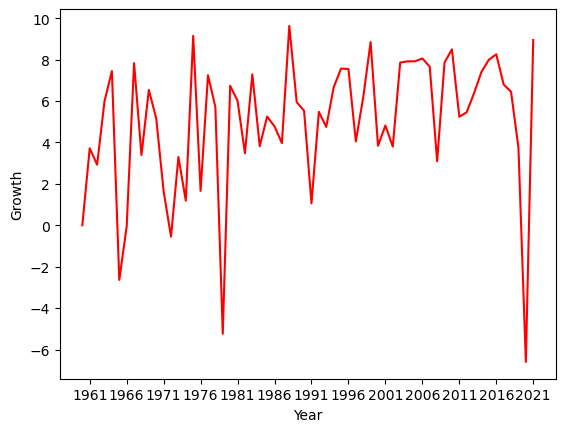

In [8]:
sns.lineplot(data=df,x='Year',y='Growth',color='red')
plt.gca().invert_xaxis()

plt.xticks(df['Year'][::5]) 


#### Is there a correlation between features in the dataset?

...


In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='PiYG')

,Year,GDP (in billion dollars),Per Capita (in dollars),Growth
Year,1.000000,0.848482,0.867579,0.307211
GDP (in billion dollars),0.848482,1.000000,0.998554,0.169999
Per Capita (in dollars),0.867579,0.998554,1.000000,0.189860
Growth,0.307211,0.169999,0.189860,1.000000


<Axes: xlabel='GDP (in billion dollars)', ylabel='Per Capita (in dollars)'>

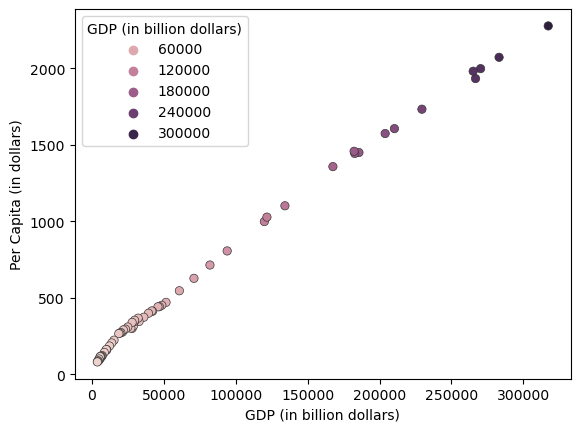

In [10]:
sns.scatterplot(data=df,x='GDP (in billion dollars)',y='Per Capita (in dollars)',hue='GDP (in billion dollars)',edgecolor='0.2')

We can conclude that Per Capita Income is positively correlated to Gross Domestic Product. It is 99% positively correlated. The higher the GDP increases so does the per capita income as evident in the scatterplot above.



In [11]:
#The growth rate in ascending order by years.

df[["Growth","Year"]].sort_values(by="Growth",ascending=True)

,Growth,Year
2,-6.60,2020
43,-5.24,1979
57,-2.64,1965
50,-0.55,1972
56,-0.06,1966
...,...,...
12,8.50,2010
23,8.85,1999
1,8.95,2021
47,9.15,1975


We can see that the growth was negative on 2020,1979 and 1965. The negative growth on 2020 is due to the corona virus outbreak which hit the economy hard. Whereas,severe drought affected large parts of the country which led to a decline of 10% in agricultural production.The poor performance of coal,power and rails transport affected the overall economic health of the country.With farm sector accounting for the dominant share of GDP, and given weak external balances, most recessions like the ones in 1965-1966 were driven by severe droughts or high international energy prices.

#### Conclusion ####

#### The Gross Domestic Product of India reached 3.4 trillion dollars ,making India the fifth larget economy in the world and it will play a crucial role in the "India Story" for the times to come. ####